<a href="https://colab.research.google.com/github/roaring90s/alura-telecomX-partI/blob/main/TelecomX_partI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
df_expanded =  pd.concat([
    df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(df['customer']),
    pd.json_normalize(df['phone']),
    pd.json_normalize(df['internet']),
    pd.json_normalize(df['account'])
], axis=1)
df_expanded.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
df_expanded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


# Transformação

In [4]:
df_expanded.isnull().sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [5]:
df_expanded.duplicated().sum()


np.int64(0)

In [6]:
for col in df_expanded.columns:
  print(f"{col}: {df_expanded[col].unique()[:10:]} ...\n")


customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS'] ...

Churn: ['No' 'Yes' ''] ...

gender: ['Female' 'Male'] ...

SeniorCitizen: [0 1] ...

Partner: ['Yes' 'No'] ...

Dependents: ['Yes' 'No'] ...

tenure: [ 9  4 13  3 71 63  7 65 54 72] ...

PhoneService: ['Yes' 'No'] ...

MultipleLines: ['No' 'Yes' 'No phone service'] ...

InternetService: ['DSL' 'Fiber optic' 'No'] ...

OnlineSecurity: ['No' 'Yes' 'No internet service'] ...

OnlineBackup: ['Yes' 'No' 'No internet service'] ...

DeviceProtection: ['No' 'Yes' 'No internet service'] ...

TechSupport: ['Yes' 'No' 'No internet service'] ...

StreamingTV: ['Yes' 'No' 'No internet service'] ...

StreamingMovies: ['No' 'Yes' 'No internet service'] ...

Contract: ['One year' 'Month-to-month' 'Two year'] ...

PaperlessBilling: ['Yes' 'No'] ...

PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'] .

In [7]:
df_expanded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [8]:
df_expanded.describe(include='all')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


In [9]:
df_clean = df_expanded.copy()


In [10]:
cols_categoricas = df_clean.select_dtypes(include='object').columns
for col in cols_categoricas:
  df_clean[col] = df_clean[col].fillna("No")

In [11]:
for col in cols_categoricas:
  df_clean[col] = df_clean[col].str.strip().str.lower()

In [12]:
cols_numericas = df_clean.select_dtypes(include=['float64', 'int64']).columns
for col in cols_numericas:
  df_clean[col] = df_clean[col].fillna(0)

In [13]:
print(df_clean.isnull().sum().sum(), "valores ausentes restantes")
df_clean.head()


0 valores ausentes restantes


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.3
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.4
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.4


In [14]:
df_clean['contas_diarias'] = df_clean['Charges.Monthly'] / 30


In [15]:
df_clean[['Charges.Monthly', 'contas_diarias']].head()


,Charges.Monthly,contas_diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [16]:
df_clean['Partner'] = df_clean['Partner'].map({'yes': 1, 'no': 0})
df_clean['Dependents'] = df_clean['Dependents'].map({'yes': 1, 'no': 0})



In [17]:
df_clean.rename(columns={
    'Charges.Monthly': 'conta_mensal',
    'Charges.Total': 'conta_total'
}, inplace=True)

In [18]:
print(df_clean.head())
print(df_clean.info())


   customerID Churn  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  0002-orfbo    no  female              0        1           1       9   
1  0003-mknfe    no    male              0        0           0       9   
2  0004-tlhlj   yes    male              0        0           0       4   
3  0011-igkff   yes    male              1        1           0      13   
4  0013-exchz   yes  female              1        1           0       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          yes            no             dsl  ...               no   
1          yes           yes             dsl  ...               no   
2          yes            no     fiber optic  ...              yes   
3          yes            no     fiber optic  ...              yes   
4          yes            no     fiber optic  ...               no   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         yes         yes              no        o

# Carga e Análise

In [20]:
df_clean.describe()


,SeniorCitizen,Partner,Dependents,tenure,conta_mensal,contas_diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,0.484106,0.300124,32.346498,64.720098,2.157337
std,0.369074,0.499782,0.458343,24.571773,30.129572,1.004319
min,0.000000,0.000000,0.000000,0.000000,18.250000,0.608333
25%,0.000000,0.000000,0.000000,9.000000,35.425000,1.180833
50%,0.000000,0.000000,0.000000,29.000000,70.300000,2.343333
75%,0.000000,1.000000,1.000000,55.000000,89.875000,2.995833
max,1.000000,1.000000,1.000000,72.000000,118.750000,3.958333


In [21]:
df_clean.describe(include='object')


,customerID,Churn,gender,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,conta_total
count,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267,7267
unique,7267,3,2,2,3,3,3,3,3,3,3,3,3,2,4,6531
top,9995-hotoh,no,male,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,20.2
freq,1,5174,3675,6560,3495,3198,3608,3182,3195,3582,2896,2870,4005,4311,2445,11


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
print(df_clean['Churn'].value_counts())


Churn
no     5174
yes    1869
        224
Name: count, dtype: int64


In [24]:
print(df_clean['Churn'].value_counts(normalize=True))


Churn
no     0.711986
yes    0.257190
       0.030824
Name: proportion, dtype: float64


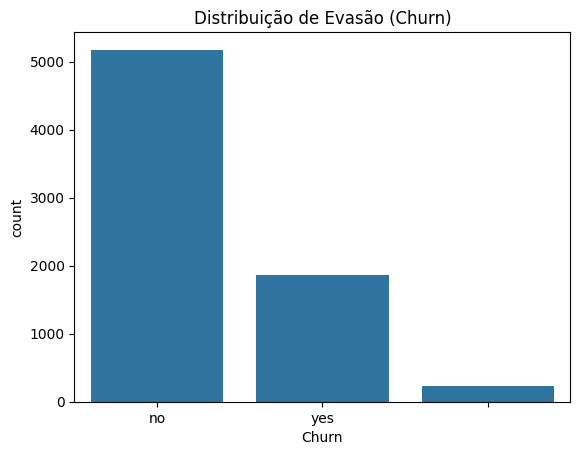

In [25]:

sns.countplot(data=df_clean, x='Churn')
plt.title("Distribuição de Evasão (Churn)")
plt.show()


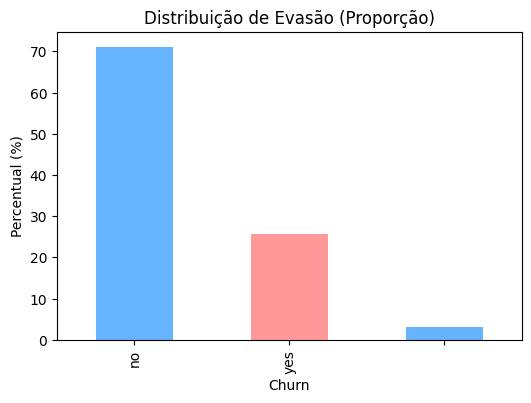

In [26]:
(df_clean['Churn']
 .value_counts(normalize=True)
 .mul(100)
 .plot(kind='bar', color=['#66b3ff','#ff9999'], figsize=(6,4)))

plt.title("Distribuição de Evasão (Proporção)")
plt.ylabel("Percentual (%)")
plt.xlabel("Churn")
plt.show()


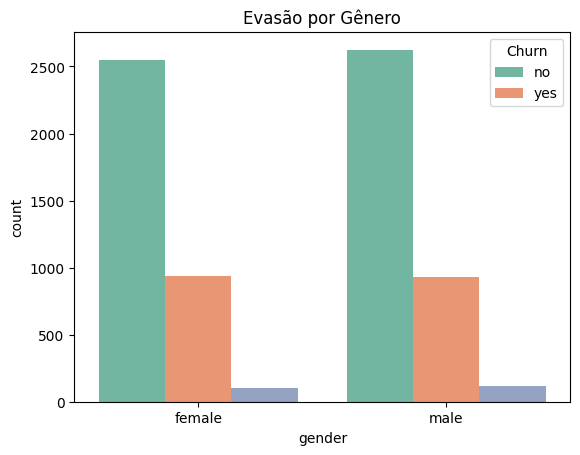

In [27]:
sns.countplot(data=df_clean, x='gender', hue='Churn', palette='Set2')
plt.title("Evasão por Gênero")
plt.show()

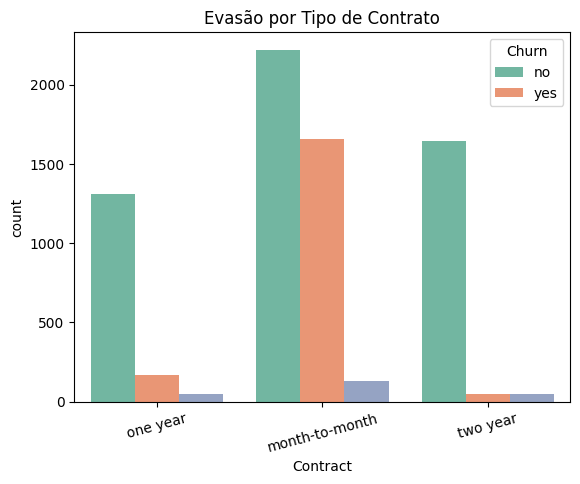

In [28]:
sns.countplot(data=df_clean, x='Contract', hue='Churn', palette='Set2')
plt.title("Evasão por Tipo de Contrato")
plt.xticks(rotation=15)
plt.show()



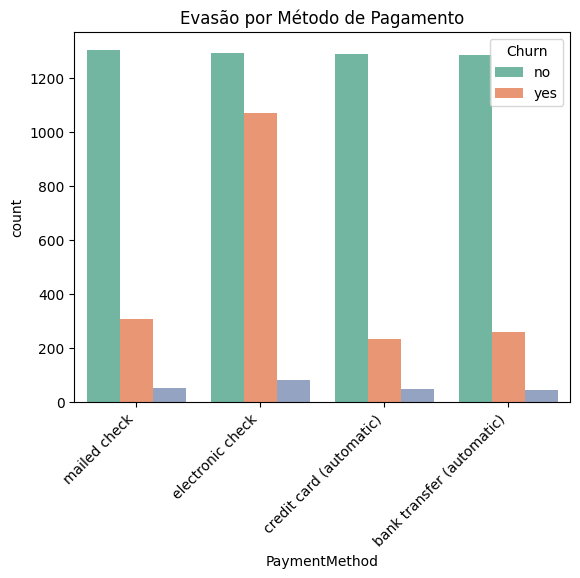

In [29]:
sns.countplot(data=df_clean, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title("Evasão por Método de Pagamento")
plt.xticks(rotation=45, ha='right')
plt.show()



# Relatório Final

#### O objetivo do projeto foi identificar os principais fatores associados à evasão de clientes (churn) na empresa Telecom X, visando embasar estratégias de retenção.

#### A análise iniciou-se com a preparação dos dados, incluindo importação, tratamento de inconsistências, padronização de variáveis categóricas e limpeza geral, garantindo qualidade e integridade analítica.

####Na etapa de exploração dos dados, observou-se que a taxa de churn é significativa. Fatores como gênero não apresentaram influência relevante, enquanto tipo de contrato e método de pagamento mostraram-se fortemente correlacionados com a evasão. Especificamente:

####Clientes com contratos mensais têm probabilidade significativamente maior de cancelar do que aqueles com contratos anuais ou bianuais.

####O uso de electronic check como forma de pagamento está associado a taxas de churn mais elevadas em comparação a débito automático ou cartão de crédito.

####Com base nos achados, recomenda-se:

####Incentivar a migração para contratos de maior duração, por meio de benefícios ou programas de fidelização.

####Investigar os motivos da evasão entre usuários de electronic check, avaliando tanto aspectos operacionais quanto perfis comportamentais.

####
Conclusão: A evasão está mais relacionada a variáveis contratuais e operacionais do que a características demográficas. Estratégias direcionadas a esses fatores podem aumentar a retenção e a sustentabilidade da base de clientes.